<a href="https://colab.research.google.com/github/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/main/01_Introducci%C3%B3n_a_la_Teledetecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%%capture
!apt install gdal-bin python-gdal python3-gdal 
!pip install xarray rasterio rioxarray
!pip install patool geopandas

<table style="border-collapse: collapse; border: none;">
  <tr>
    <td style="border: none; text-align: left; vertical-align: top;">
    </td>
    <td style="border: none; text-align: right; vertical-align: top;">
      <img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/1d201ef57b2ecf6c93e802f3fbe62666f51be51f/figuras/UAI_EO_logo2_purple.png?raw=true" alt="alt text" title="Image Title" width="300"/>
    </td>
  </tr>
</table>


# Introducción a la teledetección ambiental

prof. Javier Lopatin | javier.lopatin@uai.cl



### Teledetección, o Percepción Remota:

- **Definición 1**. La <span style="color:red">**adquisición de información sobre un objeto a distancia**</span>, esto es, <span style="color:blue">**sin que exista contacto**</span> material entre el objeto o sistema observado y el observador (visión humana, sonar...).

- **Definición 2** (más restrictiva). La teledetección electromagnética es la disciplina científica que reagrupa el conjunto de conocimientos y técnicas utilizadas para la  <span style="color:red">**observación, análisis, interpretación y gestión del medio ambiente a partir de**</span> <span style="color:blue">**demedidas e imágenes obtenidas con ayuda de plataformas aerotransportadas, espaciales, terrestres o marítimas.**</span>


<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/5a7965668cd02269d10ac270dad114b75be7f2bf/figuras/interaccionUsuario.png?raw=true" alt="Image" width="1000"/>

### Tipos de datos espaciales

Hay dos grandes tipos de datos espaciales:

- **Vectores**: Están compuestos por <span style="color:blue">puntos, líneas, o polígonos</span>.  Estructuralmente, se compone por vértices y pasos. 

- **Raster**: Son <span style="color:blue">imágenes compuestas por píxeles</span> (también denominados celdas de la cuadrícula). Suelen estar espaciados regularmente y ser cuadrados (llamados pixeles), pero no tienen porqué serlo. Los rasters suelen tener un aspecto pixelado porque cada píxel tiene su propio valor o clase.

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/5a7965668cd02269d10ac270dad114b75be7f2bf/figuras/vectorRaster.png?raw=True" alt="drawing" width="800"/>


### Imagen digital

<span style="color:blue">**Cada píxel tiene asignado un nivel digital (ND)**</span> . Los ND pueden contener valores de una medida de la luz reflejada, como es el caso de las imágenes  del satélite Landsat TM o Sentinel-2, pueden pertenecer al espectro visible o tener una longitud de onda distinta, como en el caso de las imágenes infrarrojas. Los ND también podrían ser una medida de la radiación emitida por un isótopo radiactivo, o representar el ultrasonido reflejado por un objeto.

Los ND podrían ser una medida física de la elevación sobre el nivel del mar, la distancia en metros a un punto definido, del costo asociado de atravesar un píxel, o de cualquier variable biofísica que pueda ser medida sistemáticamente sobre un espacio bidimensional. 


<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/316a2bf3de3190eb06fc0a16aa7d627cf94f7bed/figuras/pixelNumeros.png?raw=true" alt="Image" width="1000"/>

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/316a2bf3de3190eb06fc0a16aa7d627cf94f7bed/figuras/pixelMonalisa.png?raw=true" alt="Image" width="1000"/>

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/316a2bf3de3190eb06fc0a16aa7d627cf94f7bed/figuras/ejemplosRasters.png?raw=true" alt="Image" width="1000"/>

## Si cargamos un archivo raster a Python, podemos ver que esta hecho de matrices de datos

Cargamos una imagen de ejemplo. Esto corresponde a un Modelo Didital de elevación. Vamos a ver que es más adelante.

En primera instancia, vamos a instalar dependencias que la máquina vitual de Google Colab necesita para funcionar adecuadamente con nuestros datos. Estas librerias son:

- GDAL (Geospatial Data Abstraction Library): librería de algoritmos creados en C y C++ para manipular datos raster. Es la base para casi todas las librerias o software raster que existe. (https://gdal.org/)

- Geopandas: Librería Python para cargar y manipular datos vectoriales. Utiliza la misma estructura de datos que Pandas.(https://geopandas.org).

- Rasterio: Librería Python para manipular datos raster. (https://rasterio.readthedocs.io/).

- Xarray: Librería Python para manipular datos raster de forma similar a Numpy. Es cómodo cuando hay series temporales o datos repetitivos en la misma área. Gran parte del curso va a usar esta estructura de datos. (https://xarray.pydata.org/en/stable/).

- RioXarray: Librería que utiilza Rasterio para abrir datos raster en formato Xarray. (https://pypi.org/project/rioxarray/).

In [32]:
# cargamos las librerias en el sistema
import xarray as xr
import rioxarray as riox
import patoolib
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# descargamos los datos necesarios para el laboratorio. La dirección de descarga puede ser cambiada
# alternativamente, pueden descargar y extraer los datos de forma manual en el PC
%%capture
!rm -R Lab01*
!wget https://github.com/alvaroparedesl/percepcion_remota/raw/main/Data/Lab01.rar
!mkdir Lab01
patoolib.extract_archive("Lab01.rar", outdir='Lab01')

In [26]:
# cargamos el dato con la libreria rioXarray
import rioxarray as riox

imagen = riox.open_rasterio('Lab01/dem_valparaiso_corte.tif').squeeze()
imagen = imagen.where(imagen != -32768)
imagen

<xarray.DataArray (y: 704, x: 1285)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    band         int64 1
  * x            (x) float64 -71.74 -71.74 -71.74 ... -71.38 -71.38 -71.38
  * y            (y) float64 -33.02 -33.02 -33.02 ... -33.21 -33.21 -33.21
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0

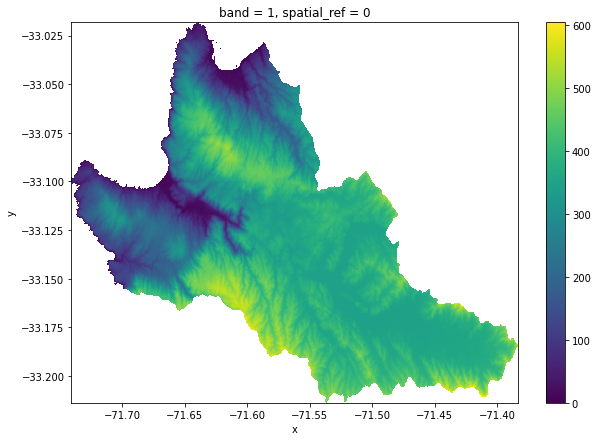

In [30]:
imagen.plot(figsize=(10,7))

In [34]:
# ejemplo de polígono (shapefile, un archivo vectorial)
poligono = gpd.read_file("Lab01/Valparaiso.shp")
poligono

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,...,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,7,6,5101,5,4.425583e+08,172199.626635,Región de Valparaíso,Valparaíso,Valparaíso,"POLYGON ((244244.096 6334289.285, 244247.058 6..."
1,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,7,6,5101,5,4.425583e+08,172199.626635,Región de Valparaíso,Valparaíso,Valparaíso,"POLYGON ((244244.062 6334286.789, 244243.545 6..."


<Axes: >

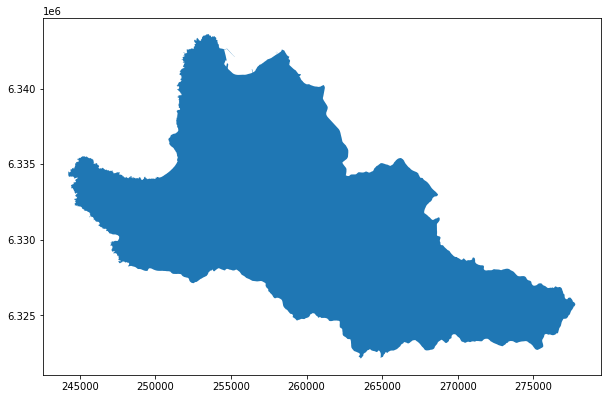

In [36]:
poligono.plot(figsize=(10,7))

## ¿Cómo se obtiene esta información?

Información de la superficie terrestre se puede obtener mediante distintas plataformas:

1. Sensores manuales
2. Sensores a baja altura
3. Drones
4. Aviones
5. Satélites


<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7f6f3e7bc32af6675499b2b7c47002a3a1e166e5/figuras/espectroscopia.png?raw=true" alt="Image" width="800"/>

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7f6f3e7bc32af6675499b2b7c47002a3a1e166e5/figuras/droneSensing.png?raw=true" alt="Image" width="800"/>

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7f6f3e7bc32af6675499b2b7c47002a3a1e166e5/figuras/satelliteSensing.png?raw=true" alt="Image" width="800"/>

## Firmas espectrales

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7f6f3e7bc32af6675499b2b7c47002a3a1e166e5/figuras/firmasEspectrales.png?raw=true" alt="Image" width="1000"/>





<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/bandas.png?raw=true" alt="Image" width="800"/>

## Ejemplos de productos raster

### Land cover

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/ejemLandCover.png?raw=true" alt="Image" width="1000"/>

### Rios, datos temporales

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/rios.gif?raw=true" alt="Image" width="700"/>

### Sedimentos

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/sedimentos.png?raw=true" alt="Image" width="700"/>

#### Biodiversidad

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/diversidadAmazonas.png?raw=true" alt="Image" width="700"/>

## Cómo se usa la información?

<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/magia.png?raw=true" alt="Image" width="700"/>


<img src="https://github.com/JavierLopatin/UAI-Teledeteccion-Aplicada/blob/7ee383dbea2935cf4183309270401f10c8015145/figuras/fieldWork.png?raw=true" alt="Image" width="700"/>



## Practico, manipulaciones en el software Guantum GIS, o QGIS.